In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mon=pd.read_csv("monday.csv",sep=";")
tue=pd.read_csv("tuesday.csv",sep=";")
wed=pd.read_csv("wednesday.csv",sep=";")
thu=pd.read_csv("thursday.csv",sep=";")
fri=pd.read_csv("friday.csv",sep=";")

In [3]:
mon.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [4]:
mon["weekday"]="monday"
tue["weekday"]="tuesday"
wed["weekday"]="wednesday"
thu["weekday"]="thurday"
fri["weekday"]="friday"

In [5]:
mon.head()

,timestamp,customer_no,location,weekday
0,2019-09-02 07:03:00,1,dairy,monday
1,2019-09-02 07:03:00,2,dairy,monday
2,2019-09-02 07:04:00,3,dairy,monday
3,2019-09-02 07:04:00,4,dairy,monday
4,2019-09-02 07:04:00,5,spices,monday


In [6]:
mon_count=len(mon["customer_no"].unique())
print("monday total customer:", mon_count)

tue_count=len(tue["customer_no"].unique())
print("tuesday total customer:", tue_count)

wed_count=len(wed["customer_no"].unique())
print("wednesday total customer:", wed_count)

thu_count=len(thu["customer_no"].unique())
print("thursday total customer:", thu_count)

fri_count=len(fri["customer_no"].unique())
print("friday total customer:", fri_count)

monday total customer: 1447
tuesday total customer: 1422
wednesday total customer: 1531
thursday total customer: 1535
friday total customer: 1510


In [7]:
mon_count=len(mon["customer_no"].unique())
mon_count

1447

In [8]:
df=pd.concat([mon,tue,wed,thu,fri])

In [9]:
df

,timestamp,customer_no,location,weekday
0,2019-09-02 07:03:00,1,dairy,monday
1,2019-09-02 07:03:00,2,dairy,monday
2,2019-09-02 07:04:00,3,dairy,monday
3,2019-09-02 07:04:00,4,dairy,monday
4,2019-09-02 07:04:00,5,spices,monday
...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,friday
5121,2019-09-06 21:50:00,1507,checkout,friday
5122,2019-09-06 21:50:00,1508,checkout,friday
5123,2019-09-06 21:50:00,1509,drinks,friday


In [10]:
df["timestamp"]=pd.to_datetime(df["timestamp"])

In [11]:
df

,timestamp,customer_no,location,weekday
0,2019-09-02 07:03:00,1,dairy,monday
1,2019-09-02 07:03:00,2,dairy,monday
2,2019-09-02 07:04:00,3,dairy,monday
3,2019-09-02 07:04:00,4,dairy,monday
4,2019-09-02 07:04:00,5,spices,monday
...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,friday
5121,2019-09-06 21:50:00,1507,checkout,friday
5122,2019-09-06 21:50:00,1508,checkout,friday
5123,2019-09-06 21:50:00,1509,drinks,friday


In [12]:
df["timestamp"]=df["timestamp"].astype(str)

In [13]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [14]:
df=df.set_index('timestamp')

In [15]:
df

,customer_no,location,weekday
timestamp,,,
2019-09-02 07:03:00,1,dairy,monday
2019-09-02 07:03:00,2,dairy,monday
2019-09-02 07:04:00,3,dairy,monday
2019-09-02 07:04:00,4,dairy,monday
2019-09-02 07:04:00,5,spices,monday
...,...,...,...
2019-09-06 21:50:00,1500,dairy,friday
2019-09-06 21:50:00,1507,checkout,friday
2019-09-06 21:50:00,1508,checkout,friday


***1) Calculate the total number of customers in each section***



In [16]:
df.groupby(by="weekday")["customer_no"].count()


weekday
friday       5125
monday       4884
thurday      5104
tuesday      4714
wednesday    5050
Name: customer_no, dtype: int64

In [17]:
df.groupby(by="location")["customer_no"].count()

location
checkout    7417
dairy       4679
drinks      3905
fruit       5122
spices      3754
Name: customer_no, dtype: int64

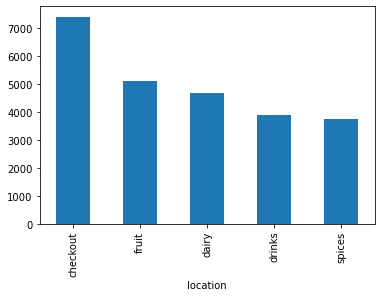

In [18]:
df.groupby('location')['customer_no'].count().sort_values(ascending=False).plot.bar();


***2)Calculate the total number of customers in each section over time***

In [19]:
df["hour"]=df.index.hour
df["min"]=df.index.minute
df["day"]=df.index.day

In [20]:
df.groupby(['location','hour'])['customer_no'].count()

location  hour
checkout  7       454
          8       677
          9       455
          10      427
          11      342
                 ... 
spices    17      269
          18      346
          19      389
          20      246
          21      122
Name: customer_no, Length: 75, dtype: int64

In [21]:
loc_time=df.groupby(['location','hour'])['customer_no'].count().to_frame().reset_index()
loc_time


,location,hour,customer_no
0,checkout,7,454
1,checkout,8,677
2,checkout,9,455
3,checkout,10,427
4,checkout,11,342
...,...,...,...
70,spices,17,269
71,spices,18,346
72,spices,19,389
73,spices,20,246


/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


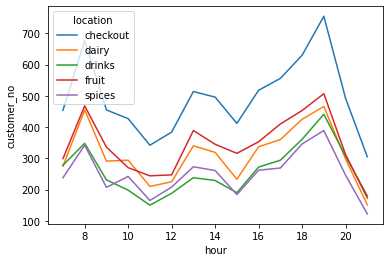

In [22]:
sns.lineplot("hour","customer_no",hue="location",data=loc_time);


***3) Display the number of customers at checkout over time***

In [23]:
loc_checkout=loc_time[loc_time["location"]=="checkout"]
loc_checkout

,location,hour,customer_no
0,checkout,7,454
1,checkout,8,677
2,checkout,9,455
3,checkout,10,427
4,checkout,11,342
5,checkout,12,384
6,checkout,13,514
7,checkout,14,496
8,checkout,15,412
9,checkout,16,518


/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


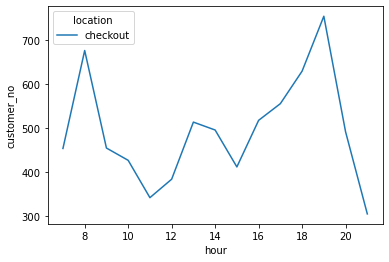

In [24]:
sns.lineplot("hour","customer_no",hue="location",data=loc_checkout);


***4) Calculate the time each customer spent in the market***

In [25]:
df=df.reset_index()
df

,timestamp,customer_no,location,weekday,hour,min,day
0,2019-09-02 07:03:00,1,dairy,monday,7,3,2
1,2019-09-02 07:03:00,2,dairy,monday,7,3,2
2,2019-09-02 07:04:00,3,dairy,monday,7,4,2
3,2019-09-02 07:04:00,4,dairy,monday,7,4,2
4,2019-09-02 07:04:00,5,spices,monday,7,4,2
...,...,...,...,...,...,...,...
24872,2019-09-06 21:50:00,1500,dairy,friday,21,50,6
24873,2019-09-06 21:50:00,1507,checkout,friday,21,50,6
24874,2019-09-06 21:50:00,1508,checkout,friday,21,50,6
24875,2019-09-06 21:50:00,1509,drinks,friday,21,50,6


In [26]:
df[df["customer_no"]==1532].groupby("weekday").head()

,timestamp,customer_no,location,weekday,hour,min,day
19746,2019-09-05 21:48:00,1532,dairy,thurday,21,48,5


In [27]:
time_spent=df.groupby(['customer_no',"weekday"])['timestamp'].max().to_frame()-df.groupby(['customer_no',"weekday"])['timestamp'].min().to_frame()
time_spent


timestamp
customer_no weekday                  
1           friday    0 days 00:05:00
            monday    0 days 00:02:00
            thurday   0 days 00:02:00
            tuesday   0 days 00:10:00
            wednesday 0 days 00:02:00
...                               ...
1531        wednesday 0 days 00:03:00
1532        thurday   0 days 00:00:00
1533        thurday   0 days 00:00:00
1534        thurday   0 days 00:01:00
1535        thurday   0 days 00:01:00

[7445 rows x 1 columns]

In [28]:
time_spent=time_spent.reset_index()
time_spent

,customer_no,weekday,timestamp
0,1,friday,0 days 00:05:00
1,1,monday,0 days 00:02:00
2,1,thurday,0 days 00:02:00
3,1,tuesday,0 days 00:10:00
4,1,wednesday,0 days 00:02:00
...,...,...,...
7440,1531,wednesday,0 days 00:03:00
7441,1532,thurday,0 days 00:00:00
7442,1533,thurday,0 days 00:00:00
7443,1534,thurday,0 days 00:01:00


In [29]:

time_spent['cust_weekd'] = time_spent["customer_no"].astype("str")+"_"+time_spent["weekday"].astype("str")


In [30]:
time_spent

,customer_no,weekday,timestamp,cust_weekd
0,1,friday,0 days 00:05:00,1_friday
1,1,monday,0 days 00:02:00,1_monday
2,1,thurday,0 days 00:02:00,1_thurday
3,1,tuesday,0 days 00:10:00,1_tuesday
4,1,wednesday,0 days 00:02:00,1_wednesday
...,...,...,...,...
7440,1531,wednesday,0 days 00:03:00,1531_wednesday
7441,1532,thurday,0 days 00:00:00,1532_thurday
7442,1533,thurday,0 days 00:00:00,1533_thurday
7443,1534,thurday,0 days 00:01:00,1534_thurday


In [31]:
temp=time_spent.groupby("customer_no")["timestamp"].sum().to_frame()
temp=temp.reset_index()
temp

,customer_no,timestamp
0,1,0 days 00:21:00
1,2,0 days 00:29:00
2,3,0 days 00:56:00
3,4,0 days 00:15:00
4,5,0 days 00:25:00
...,...,...
1530,1531,0 days 00:06:00
1531,1532,0 days 00:00:00
1532,1533,0 days 00:00:00
1533,1534,0 days 00:01:00


In [32]:
temp["min_spent"]=temp["timestamp"]

In [33]:
#time_spent["spent_min"]=time_spent.groupby("customer_no")["timestamp"].sum().to_frame()

In [34]:
#time_spent

In [35]:
time_spent=time_spent.merge(temp,how="inner",on="customer_no")

In [36]:
time_spent.drop(["timestamp_x","timestamp_y","weekday"],axis=1,inplace=True)

In [37]:
time_spent.drop_duplicates(inplace=True)
time_spent

,customer_no,cust_weekd,min_spent
0,1,1_friday,0 days 00:21:00
1,1,1_monday,0 days 00:21:00
2,1,1_thurday,0 days 00:21:00
3,1,1_tuesday,0 days 00:21:00
4,1,1_wednesday,0 days 00:21:00
...,...,...,...
7440,1531,1531_wednesday,0 days 00:06:00
7441,1532,1532_thurday,0 days 00:00:00
7442,1533,1533_thurday,0 days 00:00:00
7443,1534,1534_thurday,0 days 00:01:00


In [38]:
time_spent["min_spent"]=time_spent["min_spent"] / np.timedelta64(1, 'm')

In [39]:
time_spent

,customer_no,cust_weekd,min_spent
0,1,1_friday,21.0
1,1,1_monday,21.0
2,1,1_thurday,21.0
3,1,1_tuesday,21.0
4,1,1_wednesday,21.0
...,...,...,...
7440,1531,1531_wednesday,6.0
7441,1532,1532_thurday,0.0
7442,1533,1533_thurday,0.0
7443,1534,1534_thurday,1.0


In [40]:
y=time_spent[time_spent["min_spent"]==0].index
y

Int64Index([7441, 7442], dtype='int64')

In [41]:
time_spent.drop(y, axis=0)

,customer_no,cust_weekd,min_spent
0,1,1_friday,21.0
1,1,1_monday,21.0
2,1,1_thurday,21.0
3,1,1_tuesday,21.0
4,1,1_wednesday,21.0
...,...,...,...
7438,1530,1530_wednesday,8.0
7439,1531,1531_thurday,6.0
7440,1531,1531_wednesday,6.0
7443,1534,1534_thurday,1.0


<AxesSubplot:xlabel='min_spent', ylabel='Count'>

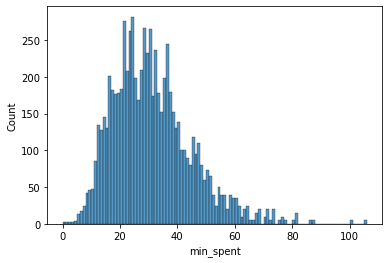

In [42]:
sns.histplot(data=time_spent['min_spent'],binwidth=1)

***5) Calculate the total number of customers in the supermarket over time.***

In [43]:
df.groupby(['hour'])['customer_no'].count()


hour
7     1544
8     2290
9     1520
10    1431
11    1111
12    1252
13    1754
14    1650
15    1335
16    1742
17    1889
18    2215
19    2558
20    1655
21     931
Name: customer_no, dtype: int64

In [44]:
mon_hour=df.groupby('hour')['customer_no'].count().to_frame().reset_index()


In [45]:
mon_hour.head()

,hour,customer_no
0,7,1544
1,8,2290
2,9,1520
3,10,1431
4,11,1111


/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


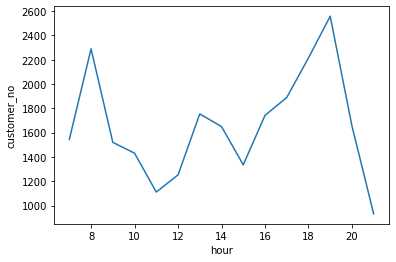

In [46]:
sns.lineplot('hour','customer_no',data=mon_hour);


***6) Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).***